In [2]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import fiona
import matplotlib.pyplot as plt
import hydrofunctions as hf

# Open Terrace Erosion Data

In [3]:
terrace_df = pd.read_excel(
    "/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/terrace_erosion_reanalysis/2020wr028389-sup-0002-data set si-s01.xlsx"
)

In [4]:
terrace_df = terrace_df.query("basin == 'Nooksack'")
terrace_gdf = gpd.GeoDataFrame(
    terrace_df,
    geometry=gpd.points_from_xy(terrace_df['lon'], terrace_df['lat']),
    crs='EPSG:4326'
)

In [5]:
terrace_gdf.to_file("/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/terrace_erosion_reanalysis/nooksack_terrace_data.geojson", driver='GeoJSON')

# Open Watershed Data

In [6]:
nooksack_forks = [
    'Lower North Fork Nooksack River',
    'Upper North Fork Nooksack River',
    'South Fork Nooksack River',
    'Middle Fork Nooksack River'
]

In [7]:
fiona.listlayers("/data2/elilouis/hsfm-geomorph/data/NHDPLUS_H_1711_HU4_GDB/NHDPLUS_H_1711_HU4_GDB.gdb")[65]

'WBDHU10'

In [8]:
wsheds_gdf = gpd.read_file(
    "/data2/elilouis/hsfm-geomorph/data/NHDPLUS_H_1711_HU4_GDB/NHDPLUS_H_1711_HU4_GDB.gdb",
    layer=65
).to_crs('EPSG:32610')
wsheds_gdf = wsheds_gdf[wsheds_gdf['Name'].isin(nooksack_forks)]

# Retrieve USGS streamgage locations

In [9]:
# From USGS Nooksack Report:
# 12205000 North Fork Nooksack nr Glacier, WA
# 12208000 Middle Fork Nooksack nr Deming, WA
# 12210700 Nooksack River at North Cedarville, WA
# 12210000 South Fork Nooksack at Saxon Bridge, WA

In [10]:
station_ids = [
    '12205000',
    '12208000',
    '12210700',
    '12210000',
    '12207200' # delete
]

In [11]:
data_list = []
for id in station_ids:
    station = hf.NWIS(id)
    data_list.append({
        'site name': station.meta[f'USGS:{id}']['siteName'],
        'lat': station.meta[f'USGS:{id}']['siteLatLongSrs']['latitude'],
        'lon': station.meta[f'USGS:{id}']['siteLatLongSrs']['longitude'],
    })
station_df = pd.DataFrame(data_list)
station_gdf = gpd.GeoDataFrame(
    station_df,
    geometry=gpd.points_from_xy(station_df['lon'], station_df['lat']),
    crs='EPSG:4326'
)

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=12205000


/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=12208000


/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:625: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not DF.index.is_monotonic:


Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=12210700


/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=12210000


/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for

Requested data from https://waterservices.usgs.gov/nwis/dv/?format=json%2C1.1&sites=12207200


/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:107: HydroUserWarning: It is not possible to determine the frequency for one of the datasets in this request. This dataset will be set to a frequency of 0 minutes
  warnings.warn(
/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/hydrofunctions/hydrofunctions.py:625: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  if not DF.index.is_monotonic:


# Map stuff

In [12]:
terrace_gdf = terrace_gdf.to_crs(wsheds_gdf.crs)
station_gdf = station_gdf.to_crs(wsheds_gdf.crs)

In [13]:
%matplotlib inline

In [14]:
import glob
streamstats_watersheds_fns = glob.glob("/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/streamstats_watersheds/*.geojson")

gdf = gpd.GeoDataFrame()
for f in streamstats_watersheds_fns:
    new_data = gpd.read_file(f)
    new_data['Valley Name'] = f.split("/")[-1].split(".geojson")[0]
    gdf = gdf.append(new_data)

nhd_df = gdf[gdf.geometry.type != "Point"]
nhd_df = nhd_df.to_crs(wsheds_gdf.crs)

/tmp/ipykernel_410047/4000329800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_data)
/tmp/ipykernel_410047/4000329800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_data)
/tmp/ipykernel_410047/4000329800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_data)
/tmp/ipykernel_410047/4000329800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_data)
/tmp/ipykernel_410047/4000329800.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(new_d

In [15]:
nhd_df['Valley Name'] = nhd_df['Valley Name'].str.capitalize()

In [16]:
wsheds_gdf.Name.unique()

array(['Upper North Fork Nooksack River', 'South Fork Nooksack River',
       'Middle Fork Nooksack River', 'Lower North Fork Nooksack River'],
      dtype=object)

In [17]:
wsheds_gdf['Short Name'] = wsheds_gdf['Name'].apply({
    'Upper North Fork Nooksack River': 'North Fork',
    'South Fork Nooksack River': 'South Fork',
    'Middle Fork Nooksack River': 'Middle Fork',
    'Lower North Fork Nooksack River': 'North Fork'
}.get)

To Do: 

* Combine the two north fork polygons
* Remove gages that we aren't using (the one in Lower North Fork watershed )
* Give short names to the watersheds
* Add lines for the Nooksack river stream location (Where do i get this?)

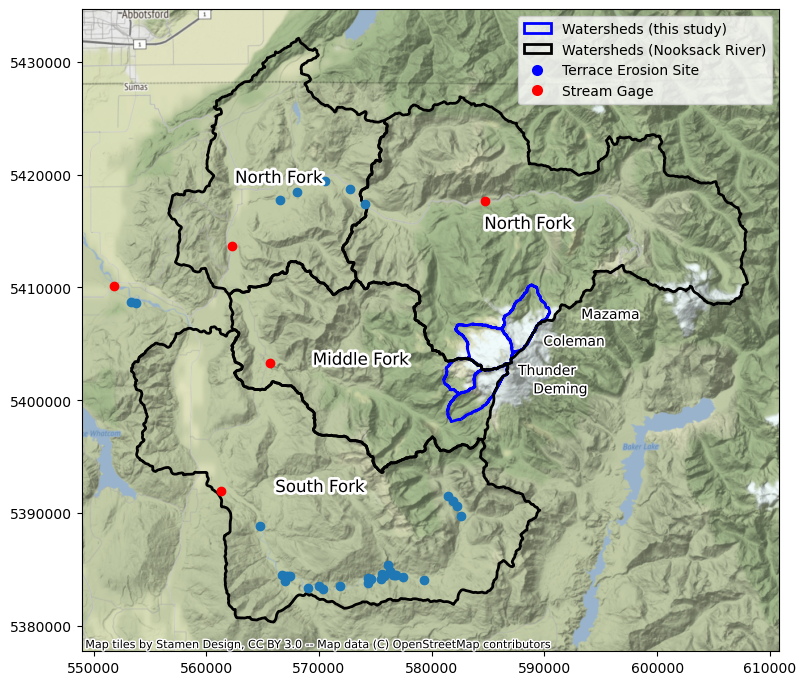

In [18]:
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

f, ax = plt.subplots(1, figsize=(9, 9))
nhd_src = nhd_df[nhd_df['Valley Name'].isin(['Coleman', 'Mazama', 'Thunder', 'Deming'])]

nhd_src.apply(lambda x: ax.annotate(text=x['Valley Name'], xy=(x.geometry.centroid.coords[0][0]+5000, x.geometry.centroid.coords[0][1]), ha='left', fontsize=10, path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]), axis=1)
nhd_src.plot(ax=ax, color='none', edgecolor='blue', linewidth=2)

wsheds_gdf.plot(ax=ax, color='none', edgecolor='black', linewidth=2)
wsheds_gdf.apply(lambda x: ax.annotate(text=x['Short Name'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=12, path_effects=[pe.withStroke(linewidth=4, foreground="white")]), axis=1)

terrace_gdf.plot(ax=ax)
station_gdf.plot(ax=ax, color='red')

handles = [
    mpatches.Patch(facecolor = 'none', edgecolor = 'blue', linewidth=2, label='Watersheds (this study)'),
    mpatches.Patch(facecolor = 'none', edgecolor = 'black', linewidth=2, label='Watersheds (Nooksack River)'),
    Line2D([0], [0], marker='o', color='none', markeredgecolor='none', markerfacecolor='blue', label='Terrace Erosion Site', markersize=8),
    Line2D([0], [0], marker='o', color='none', markeredgecolor='none', markerfacecolor='red', label='Stream Gage', markersize=8)
]

plt.legend(handles=handles)

ctx.add_basemap(ax, crs = wsheds_gdf.crs)
plt.ticklabel_format(style='plain')
plt.show()

In [19]:
wsheds_gdf_just3 = pd.concat([
    wsheds_gdf[wsheds_gdf['Short Name'] != 'North Fork'][['Name', 'Short Name', 'geometry']],
    gpd.GeoDataFrame({
    'Name' : ['North Fork Nooksack River'],
    'Short Name': ['North Fork'],
    'geometry': [wsheds_gdf.loc[wsheds_gdf['Name'] == 'Upper North Fork Nooksack River'].geometry.iloc[0].union(
        wsheds_gdf.loc[wsheds_gdf['Name'] == 'Lower North Fork Nooksack River'].geometry.iloc[0]
    )]
})
])

wsheds_gdf_just3 = wsheds_gdf_just3.set_crs(wsheds_gdf.crs) 

stations_gdf_just4 = station_gdf.iloc[:-1]

/home/elilouis/mambaforge/envs/hsfm/lib/python3.9/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 / UTM zone 10N (the single non-null crs provided).
  warnings.warn(


In [20]:
import cartopy

In [21]:
cartopy.feature.RIVERS

In [30]:
streamlines_gdf = gpd.read_file('/data2/elilouis/hsfm-geomorph/data/mt_baker_mass_wasted/ECY_WAT_NHDWAMajor.gdb', layer=2).to_crs(wsheds_gdf_just3.crs)

In [31]:
streamlines_gdf = streamlines_gdf.cx[548965.5616015878: 610837.19530237, 5377715.576250239:5434687.776431516]
streamlines_gdf = streamlines_gdf[streamlines_gdf.GNIS_Name.isin([
    'North Fork Nooksack River', 'Middle Fork Nooksack River',
       'Nooksack River', 'South Fork Nooksack River',
])]

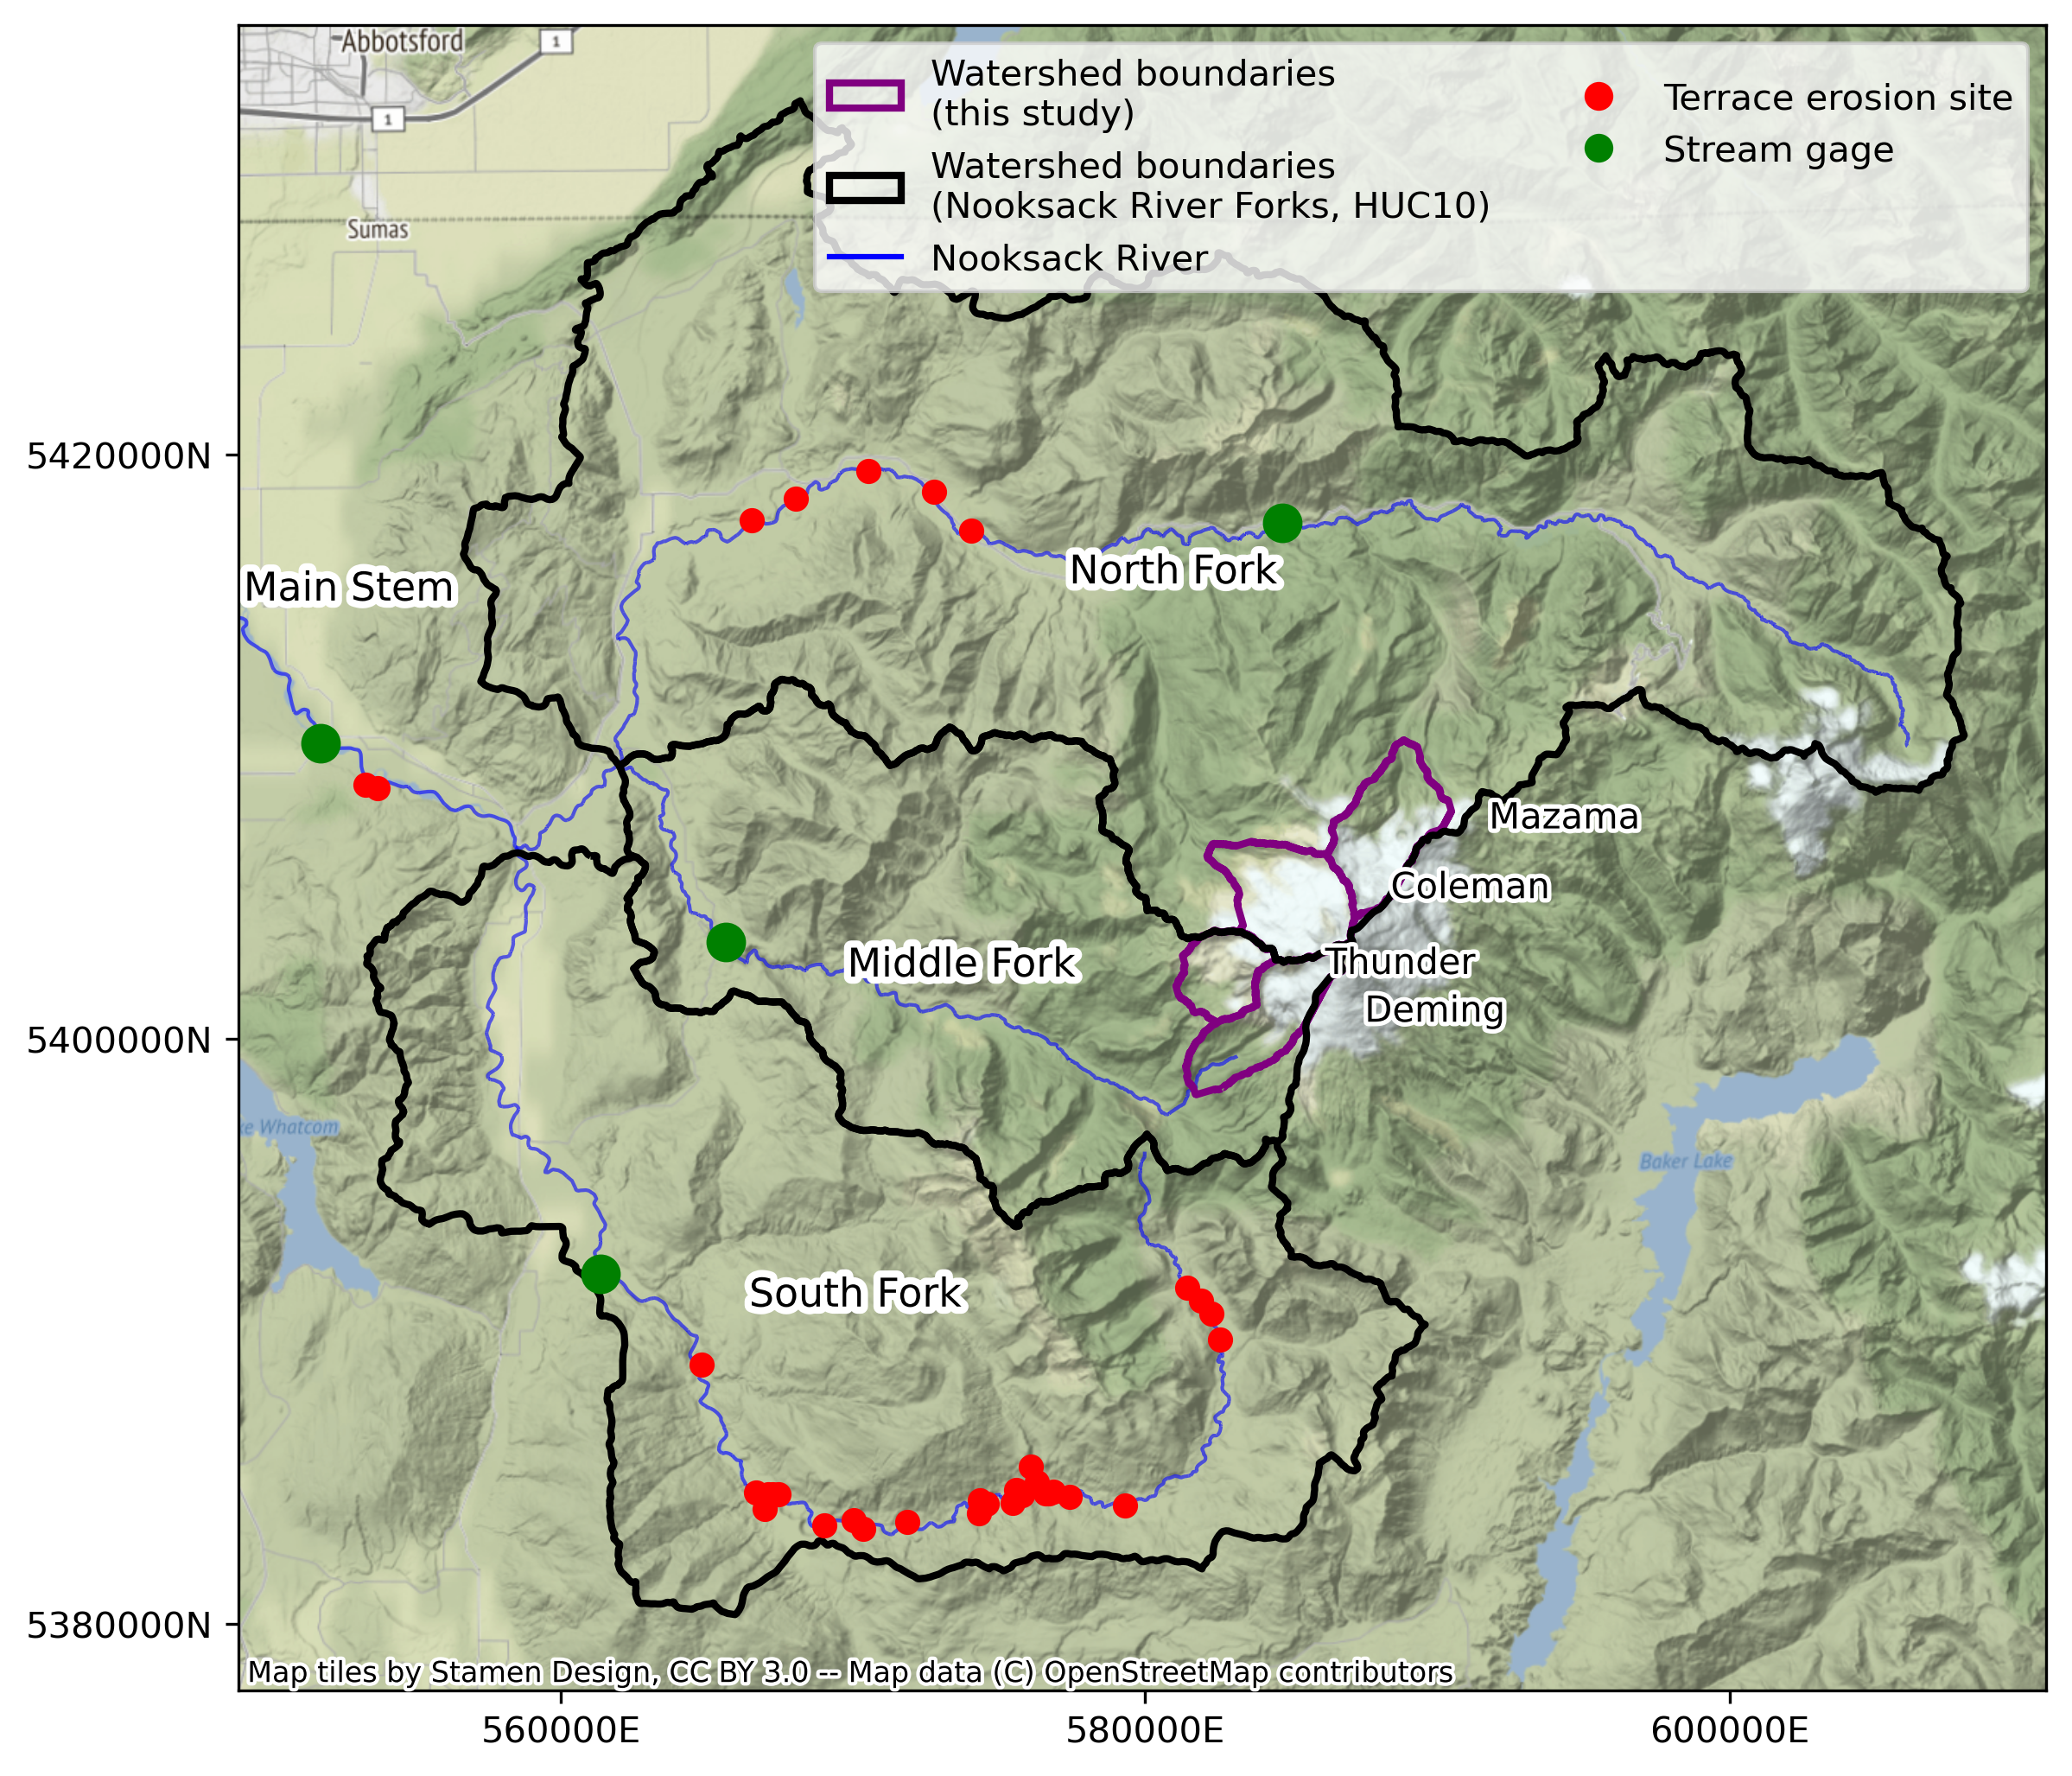

In [51]:
import matplotlib.patheffects as pe
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

f, ax = plt.subplots(1, figsize=(9, 9), dpi=300)

streamlines_gdf.plot(ax=ax, color='blue', linewidth=1, zorder=1, alpha=0.6)

nhd_src = nhd_df[nhd_df['Valley Name'].isin(['Coleman', 'Mazama', 'Thunder', 'Deming'])]

nhd_src.apply(lambda x: ax.annotate(text=x['Valley Name'], xy=(x.geometry.centroid.coords[0][0]+3500, x.geometry.centroid.coords[0][1]), ha='left', fontsize=10, path_effects=[pe.withStroke(linewidth=2.5, foreground="white")]), axis=1)
nhd_src.plot(ax=ax, color='none', edgecolor='purple', linewidth=2)

wsheds_gdf_just3.plot(ax=ax, color='none', edgecolor='black', linewidth=2)
wsheds_gdf_just3.apply(lambda x: ax.annotate(text=x['Short Name'], xy=(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1]-1000), ha='center', fontsize=11, path_effects=[pe.withStroke(linewidth=4, foreground="white")]), axis=1)

terrace_gdf.plot(ax=ax, color='red')
stations_gdf_just4.plot(ax=ax, color='green', markersize=100)

handles = [
    mpatches.Patch(facecolor = 'none', edgecolor = 'purple', linewidth=2, label='Watershed boundaries\n(this study)'),
    mpatches.Patch(facecolor = 'none', edgecolor = 'black', linewidth=2, label='Watershed boundaries\n(Nooksack River Forks, HUC10)'),
    Line2D([4], [0], color='blue', label='Nooksack River'),
    Line2D([0], [0], marker='o', color='none', markeredgecolor='none', markerfacecolor='red', label='Terrace erosion site', markersize=8),
    Line2D([0], [0], marker='o', color='none', markeredgecolor='none', markerfacecolor='green', label='Stream gage', markersize=8),
    
]

ax.annotate(
    text='Main Stem',
    xy=(552750, 5415000),
    ha='center',
    fontsize=11,
    path_effects=[pe.withStroke(linewidth=4,foreground="white")]
)

plt.legend(handles=handles, ncols=2)

ctx.add_basemap(ax, crs = wsheds_gdf_just3.crs)
plt.ticklabel_format(style='plain')
plt.xticks(
    [560000, 580000, 600000],
    ['560000E', '580000E', '600000E']
)
plt.yticks(
    [5380000, 5400000, 5420000],
    ['5380000N', '5400000N', '5420000N']
)
plt.xlim(548965.5616015878, 610837.19530237)
plt.ylim(5377715.576250239, 5434687.776431516)
plt.show()

# Calculate total terrace erosion in Nooksack River

In [14]:
print("Nooksack River (whole)")
print(round(terrace_gdf['bluff_erosion_vol_m3_per_yr'].sum()))
print(round(terrace_gdf['bluff_erosion_vol_m3_per_yr_lo'].sum()))
print(round(terrace_gdf['bluff_erosion_vol_m3_per_yr_hi'].sum()))
for idx, row in wsheds_gdf.iterrows():
    print(row['Name'])
    local_terrace_erosion = terrace_gdf[terrace_gdf.within(
            row.geometry
        )]
    print(round(local_terrace_erosion['bluff_erosion_vol_m3_per_yr'].sum()))
    print(round(local_terrace_erosion['bluff_erosion_vol_m3_per_yr_lo'].sum()))
    print(round(local_terrace_erosion['bluff_erosion_vol_m3_per_yr_hi'].sum()))

Nooksack River (whole)
71084
69286
72882
Upper North Fork Nooksack River
0
0
0
South Fork Nooksack River
33934
32938
34931
Middle Fork Nooksack River
0
0
0
Lower North Fork Nooksack River
9739
9527
9950
